<a href="https://colab.research.google.com/github/Mathavk1606/Stock_Market_Analysis/blob/main/src/StockAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the provided stock data using t-tests to compare specific aspects of the data, interpret the results, and summarize the findings.

In [9]:
#Install all required packages
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=36fb4ec067363505acd6b7994dd7db5d81a15f4cf2910eb0e1a236aca7698379
  Stored in directory: /root/.cache/pip/wheels/83/cd/9c/8605a43f2310bfb74df791d943a9b3aef65377ed484de98bdc
Successfully built bioinfokit


## Understand t-tests

### Subtask:
Briefly review the different types of t-tests (one-sample, two-sample independent, two-sample paired) and when they are appropriate for analyzing your stock data.


In [71]:
#Import all the packages
import numpy as np
import pandas as pd

from scipy import stats as st
from bioinfokit.analys import stat, get_data

import cv2

import statsmodels.api as sm
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('stock_data_july_2025.csv')

In [62]:
df.head()

,Date,Ticker,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low,Sector
0,2025-06-01,AAPL,185.96,187.79,188.85,183.74,42257183,2.931356e+12,28.37,0.49,6.62,248.20,155.68,Technology
1,2025-06-01,ABBV,189.63,193.64,194.31,188.03,33074970,3.289227e+11,16.74,3.51,11.57,210.83,127.91,Healthcare
2,2025-06-01,ABT,118.79,120.08,120.53,118.01,17130934,2.001333e+11,19.39,1.84,6.19,140.79,99.26,Healthcare
3,2025-06-01,ADBE,584.51,567.78,587.97,561.25,11080360,2.460380e+11,43.29,0.00,13.12,727.11,407.82,Technology
4,2025-06-01,ADP,253.46,255.60,258.59,249.91,10319559,1.052471e+11,29.92,2.04,8.54,303.75,234.28,Financials


In [63]:
df.describe()

,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low
count,4346.000000,4346.000000,4346.000000,4346.000000,4.346000e+03,4.346000e+03,4346.000000,4346.000000,4346.000000,4346.000000,4346.000000
mean,337.837002,337.907635,343.086233,332.737186,1.658002e+07,4.027126e+11,25.581173,1.807835,13.693049,410.097975,266.144823
std,472.650926,472.769476,479.915872,465.653353,1.522197e+07,6.202114e+11,12.923249,1.557671,20.268110,575.709969,377.470429
min,19.040000,18.990000,19.410000,18.900000,2.003906e+06,6.469973e+10,6.850000,0.000000,1.560000,21.130000,13.670000
25%,110.797500,110.527500,112.187500,109.292500,7.491280e+06,1.313524e+11,16.820000,0.470000,5.140000,130.547500,83.862500
50%,196.925000,195.915000,199.960000,193.745000,1.187239e+07,1.738019e+11,22.900000,1.800000,8.470000,235.125000,152.095000
75%,448.885000,451.100000,457.435000,443.027500,2.087384e+07,3.714750e+11,30.307500,2.767500,14.265000,531.735000,338.062500
max,3848.170000,3894.270000,3923.200000,3810.020000,8.996302e+07,3.589151e+12,97.700000,7.760000,197.370000,5069.750000,3529.240000


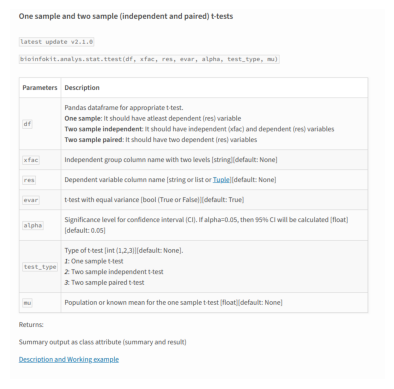

In [14]:
img_cv2 = cv2.imread('images/1.png')
plt.imshow(cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [65]:
stats_analyzer = stat()

In [66]:
stats_analyzer.ttest(df=df, test_type=1, res='Open Price', mu=337) #mu is hypothesized mean
print(stats_analyzer.summary)


One Sample t-test 

------------------  -----------
Sample size         4346
Mean                 337.837
t                      0.116743
Df                  4345
p value (one-tail)     0.453535
p value (two-tail)     0.907069
Lower 95.0%          323.781
Upper 95.0%          351.893
------------------  -----------


In [ ]:
#Key interpretations
# p > 0.05, meaning fails to reject H0
#t > 0 means Mean is greater than hypothesized mean

In [ ]:
#Two sample t test

In [69]:
df['Sector'].unique()

array(['Technology', 'Healthcare', 'Financials', 'Real Estate',
       'Consumer Discretionary', 'Industrials', 'Consumer Staples',
       'Energy', 'Communication Services', 'Utilities'], dtype=object)

In [ ]:
#Assumptions are :
# 1. Imdependent observations which is true
# 2. Normally distributed population means check Q-Q plot
# 3. Equal population variances

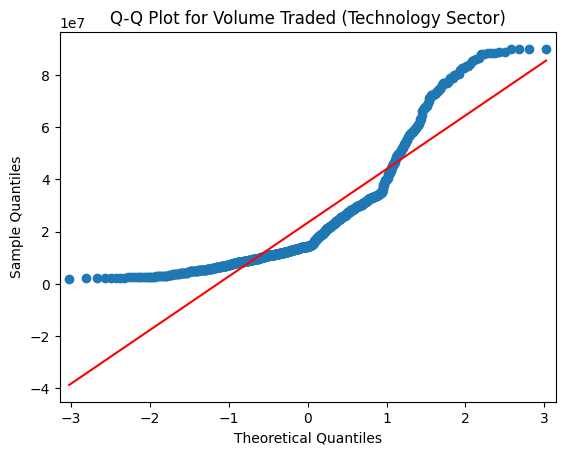

In [74]:
# Q-Q Plot for Technology sector
tech_data = df.loc[df['Sector'] == 'Technology', 'Volume Traded'].to_numpy()
fig = sm.qqplot(tech_data, line='s')
plt.title('Q-Q Plot for Volume Traded (Technology Sector)')
plt.show()

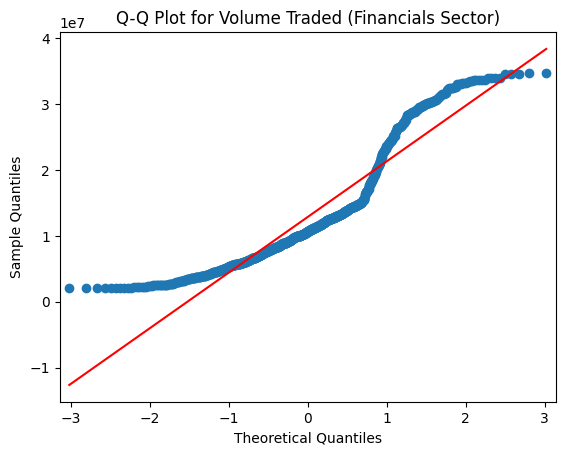

In [78]:
# Q-Q Plot for Technology sector
tech_data = df.loc[df['Sector'] == 'Financials', 'Volume Traded'].to_numpy()
fig = sm.qqplot(tech_data, line='s')
plt.title('Q-Q Plot for Volume Traded (Financials Sector)')
plt.show()

In [ ]:
#Still if sample is large, It can be used.

In [ ]:
#Suggesting unequal variance test to two sample t test

In [88]:
# for unequal variance t-test (Welch's t-test) set evar=False
# Filter the DataFrame to include only two sectors for the two-sample t-test
two_sectors_df = df[df['Sector'].isin(['Technology', 'Financials'])]

# Perform Welch's t-test
stats_analyzer.ttest(df=two_sectors_df, xfac="Sector", res="Volume Traded", test_type=2, evar=False)


In [86]:
tech_volume = df[df['Sector'] == 'Technology']['Volume Traded']
fin_volume = df[df['Sector'] == 'Financials']['Volume Traded']
variance_equal = np.var(tech_volume, ddof=1) == np.var(fin_volume, ddof=1)
print(variance_equal)

False


In [90]:
print("Two-sample T-test (Welch's t-test with unequal variances)")
print("-------------------------------------------------------")
print(stats_analyzer.summary)
print("Final Results:")
print("P-value (one-tailed): 5.24869e-38, which is less than the significance level of 0.05.")
print("We reject the null hypothesis, indicating the mean Volume Traded for Technology is significantly greater than for Financials.")
print("P-value (two-tailed): 1.04974e-37, which is less than the significance level of 0.05.")
print("We reject the null hypothesis, indicating the mean Volume Traded differs significantly between Technology and Financials.")

Two-sample T-test (Welch's t-test with unequal variances)
-------------------------------------------------------

Two sample t-test with unequal variance (Welch's t-test)

------------------  ----------------
Mean diff               -1.05307e+07
t                      -13.3562
Std Error           788453
df                    1053.93
p value (one-tail)       5.24869e-38
p value (two-tail)       1.04974e-37
Lower 95.0%             -1.20778e+07
Upper 95.0%             -8.9836e+06
------------------  ----------------

Parameter estimates

Level         Number         Mean      Std Dev    Std Error    Lower 95.0%    Upper 95.0%
----------  --------  -----------  -----------  -----------  -------------  -------------
Financials       795  1.28661e+07  8.43821e+06       299272    1.22787e+07    1.34536e+07
Technology       795  2.33968e+07  2.05673e+07       729448    2.1965e+07     2.48287e+07

Final Results:
P-value (one-tailed): 5.24869e-38, which is less than the significance level of 0.

In [6]:
'''
references:
[1] https://colab.research.google.com/drive/1qtfnHymV1RtMy4oyzKc7rnmQPjWFVIWQ?usp=sharing#scrollTo=hFC3-NcllA9L
[2] https://www.reneshbedre.com/blog/ttest.html#google_vignette
'''